In [ ]:
pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
pip install kagglehub

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 75% 122M/163M [00:00<00:00, 1.27GB/s]
100% 163M/163M [00:00<00:00, 1.12GB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(len(with_mask_files))
print(with_mask_files[10:15])

3725
['with_mask_2566.jpg', 'with_mask_789.jpg', 'with_mask_2405.jpg', 'with_mask_879.jpg', 'with_mask_725.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(len(without_mask_files))
print(without_mask_files[10:15])

3828
['without_mask_3487.jpg', 'without_mask_3231.jpg', 'without_mask_1722.jpg', 'without_mask_787.jpg', 'without_mask_164.jpg']


In [9]:
print("Numbers of with Mask Files:", len(with_mask_files))
print("Numbers of without Mask Files:", len(without_mask_files))

Numbers of with Mask Files: 3725
Numbers of without Mask Files: 3828


1 --> With Mask


0 --> Without Mask

Creating Labels


In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels= with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


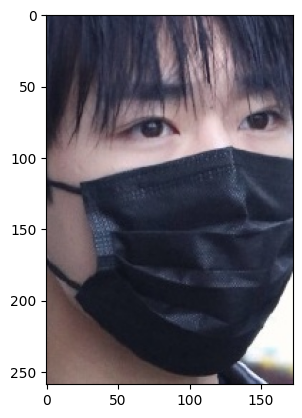

In [14]:
#displaying with mask_image
img = mpimg.imread('/content/data/with_mask/with_mask_1540.jpg')
imgplot = plt.imshow(img)
plt.show()

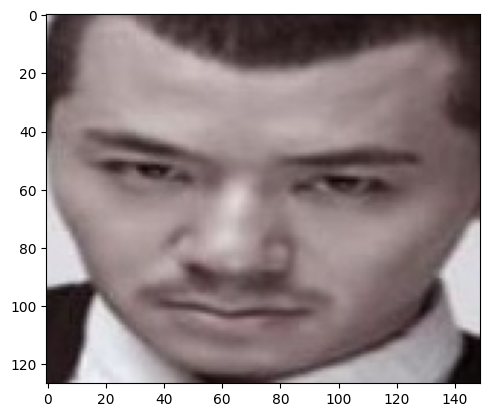

In [15]:
# Displaying without without mask
img = mpimg.imread('/content/data/without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

### **Image Processing**

1. Resize the image
2. Convert the image into numpy arrays

In [16]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[255, 251, 239],
        [255, 251, 239],
        [255, 251, 239],
        ...,
        [255, 242, 226],
        [255, 242, 225],
        [255, 242, 224]],

       [[255, 251, 239],
        [255, 251, 239],
        [255, 251, 239],
        ...,
        [255, 242, 226],
        [255, 242, 225],
        [255, 242, 224]],

       [[255, 251, 239],
        [255, 251, 239],
        [255, 251, 239],
        ...,
        [255, 242, 226],
        [255, 242, 225],
        [255, 242, 224]],

       ...,

       [[234, 225, 206],
        [234, 226, 201],
        [230, 224, 185],
        ...,
        [237, 222, 196],
        [242, 227, 204],
        [241, 230, 208]],

       [[235, 223, 203],
        [234, 223, 196],
        [227, 218, 176],
        ...,
        [237, 222, 195],
        [242, 226, 202],
        [243, 229, 205]],

       [[238, 222, 200],
        [236, 221, 194],
        [225, 213, 172],
        ...,
        [238, 223, 195],
        [242, 226, 201],
        [243, 229, 203]]], dtype=uint8)
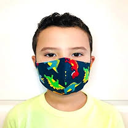

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
X = np.array(data)
Y = np.array(labels)

In [24]:
print('Type of X:', type(X))
print('Type of Y:', type(Y))

Type of X: <class 'numpy.ndarray'>
Type of Y: <class 'numpy.ndarray'>


In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


Scalling the data

In [29]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[ 24,  24,  24],
        [ 29,  29,  29],
        [ 26,  26,  26],
        ...,
        [ 25,  26,  28],
        [ 22,  23,  25],
        [ 19,  20,  22]],

       [[ 26,  26,  26],
        [ 28,  28,  28],
        [ 26,  26,  26],
        ...,
        [ 26,  28,  30],
        [ 21,  22,  24],
        [ 19,  20,  22]],

       [[ 25,  25,  25],
        [ 28,  28,  28],
        [ 25,  25,  25],
        ...,
        [ 24,  25,  27],
        [ 23,  24,  26],
        [ 21,  22,  24]],

       ...,

       [[247, 253, 254],
        [247, 254, 253],
        [246, 254, 252],
        ...,
        [ 48,  52,  58],
        [ 61,  65,  74],
        [ 53,  61,  70]],

       [[248, 252, 255],
        [248, 253, 255],
        [247, 254, 253],
        ...,
        [ 44,  50,  58],
        [ 47,  54,  64],
        [ 46,  56,  65]],

       [[250, 253, 254],
        [248, 252, 254],
        [250, 255, 255],
        ...,
        [ 42,  49,  58],
        [ 42,  51,  61],
        [ 32,  41,  53]]], dtype=uint8)
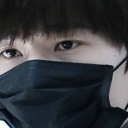

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.09411765, 0.09411765, 0.09411765],
        [0.11372549, 0.11372549, 0.11372549],
        [0.10196078, 0.10196078, 0.10196078],
        ...,
        [0.09803922, 0.10196078, 0.10980392],
        [0.08627451, 0.09019608, 0.09803922],
        [0.0745098 , 0.07843137, 0.08627451]],

       [[0.10196078, 0.10196078, 0.10196078],
        [0.10980392, 0.10980392, 0.10980392],
        [0.10196078, 0.10196078, 0.10196078],
        ...,
        [0.10196078, 0.10980392, 0.11764706],
        [0.08235294, 0.08627451, 0.09411765],
        [0.0745098 , 0.07843137, 0.08627451]],

       [[0.09803922, 0.09803922, 0.09803922],
        [0.10980392, 0.10980392, 0.10980392],
        [0.09803922, 0.09803922, 0.09803922],
        ...,
        [0.09411765, 0.09803922, 0.10588235],
        [0.09019608, 0.09411765, 0.10196078],
        [0.08235294, 0.08627451, 0.09411765]],

       ...,

       [[0.96862745, 0.99215686, 0.99607843],
        [0.96862745, 0.99607843, 0.99215686],
        [0.96470588, 0

Build a Convolutional neural Networks(CNN)

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#Compile The Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [52]:
#training the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9492 - loss: 0.1464 - val_acc: 0.9025 - val_loss: 0.3464
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9519 - loss: 0.1209 - val_acc: 0.9174 - val_loss: 0.3184
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9582 - loss: 0.1025 - val_acc: 0.9174 - val_loss: 0.3083
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9711 - loss: 0.0791 - val_acc: 0.9306 - val_loss: 0.3975
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9685 - loss: 0.0851 - val_acc: 0.9240 - val_loss: 0.3132
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9775 - loss: 0.0722 - val_acc: 0.9190 - val_loss: 0.3841
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9717 - loss: 0.0769 - val_acc: 0.9174 - val_loss: 0.3574
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9787 - loss: 0.0570 - val_acc: 0.9157 - val_loss: 0.3608
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/

In [53]:
#Model Evaluation
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Model Accuracy:',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9257 - loss: 0.3245
Model Accuracy: 0.9278623461723328


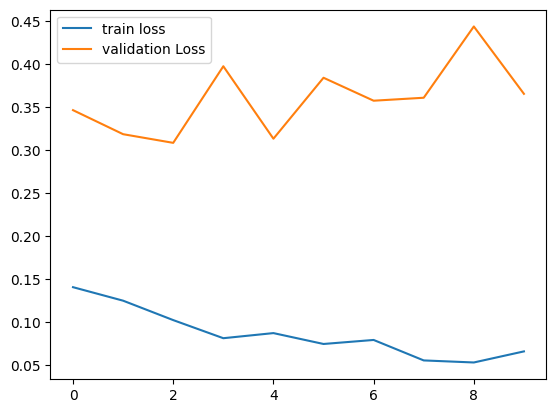

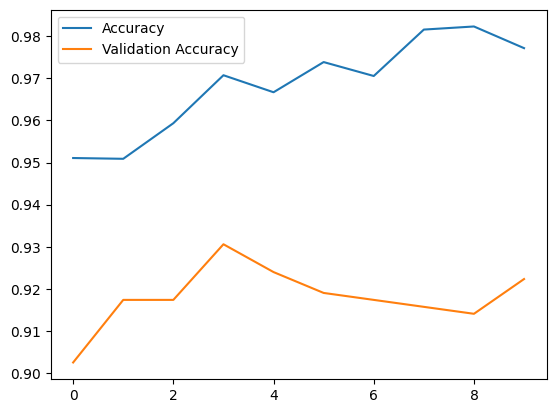

In [54]:
#Plot the Loss Values
h = history
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'], label= 'validation Loss')
plt.legend()
plt.show()

#Plot the Accuracy Values
plt.plot(h.history['acc'], label = 'Accuracy')
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [61]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Output hidden; open in https://colab.research.google.com to view.